In [1]:
import pandas as pd
import numpy as np

#Data
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Measures
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

#Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
        'size'   : 14}

matplotlib.rc('font', **font)

In [2]:
heart_attack = pd.read_csv('dataset/heart_attack.csv')
heart_attack = heart_attack.sample(frac=1, random_state=42).reset_index(drop=True)
y_class = 'output'

In [3]:
stroke = pd.read_csv('dataset/stroke.csv').sample(frac=1,random_state=42).reset_index(drop=True)
stroke.drop(['id'], axis=1,inplace=True)
stroke.fillna(method='ffill',inplace=True)
y_class = 'stroke'




enc = LabelEncoder()
for i in stroke.columns:
    if stroke[i].dtype == "object":
        stroke[i]=enc.fit_transform(stroke[i])



In [4]:
marketing_campaign = pd.read_csv('dataset/marketing_campaign.csv',sep=';').sample(frac=1,random_state=42).reset_index(drop=True)
marketing_campaign = marketing_campaign.dropna()
marketing_campaign= marketing_campaign.reset_index(drop=True)
marketing_campaign.drop(['ID', 'Dt_Customer'], axis=1,inplace=True)
y_class = 'Response'



enc = LabelEncoder()
for i in marketing_campaign.columns:
    if marketing_campaign[i].dtype == "object":
        marketing_campaign[i]=enc.fit_transform(marketing_campaign[i])

In [5]:
heart_failure = pd.read_csv('dataset/heart_failure.csv')
y_class = 'HeartDisease'

enc = LabelEncoder()
for i in heart_failure.columns:
    if heart_failure[i].dtype == "object":
        heart_failure[i]=enc.fit_transform(heart_failure[i])

In [6]:
airline_passenger = pd.read_csv('dataset/airline_passenger.csv')
airline_passenger.dropna(inplace=True)
airline_passenger.drop(['Unnamed: 0','id'], axis=1,inplace=True)
airline_passenger['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)
airline_passenger = airline_passenger.reset_index(drop=True)

y_class = 'satisfaction'

enc = LabelEncoder()
for i in airline_passenger.columns:
    if airline_passenger[i].dtype == "object":
        airline_passenger[i]=enc.fit_transform(airline_passenger[i])


In [7]:
datasets = {
    'heart_attack': (heart_attack, 'output'),
    'stroke': (stroke, 'stroke'),
    'marketing_campaign': (marketing_campaign, 'Response'),
    'heart_failure': (heart_failure, 'HeartDisease'),
    'airline_passenger': (airline_passenger, 'satisfaction')
}

In [8]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}
classifier_names = list(classifiers.keys())
measure_steps = [0.1, 0.3, 0.5, 0.8, 1]
n_steps = len(measure_steps)
metrics = {
    'Accuracy': np.zeros((len(datasets), len(classifiers), n_steps)),
    #'Train Accuracy': np.zeros((len(datasets), len(classifiers), n_steps)),
    'Precision': np.zeros((len(datasets), len(classifiers), n_steps)),
    'Recall': np.zeros((len(datasets), len(classifiers), n_steps)),
    'F1 Score': np.zeros((len(datasets), len(classifiers), n_steps))
}

In [9]:
for k, (dataset_name, (dataset, y_class)) in enumerate(datasets.items()):

    for i, step in enumerate(measure_steps):

        train, test = train_test_split(dataset, test_size=0.3, random_state=42)
        X_test = test.drop([y_class], axis=1)
        y_test = test[y_class]

        train_new = pd.concat([train, train.sample(frac=step, random_state=42)]).sample(frac=1,  random_state=42).reset_index(drop=True)
        X_train_new = train_new.drop([y_class],axis=1)
        y_train_new = train_new[y_class]



        for j, (classifier_name, classifier) in enumerate(classifiers.items()):

                scaler = StandardScaler()
                train_X_scaled = scaler.fit_transform(X_train_new)
                test_X_scaled = scaler.transform(X_test)

                # Train the classifier
                classifier.fit(train_X_scaled, y_train_new)

                # Make predictions on the fixed test set
                predictions = classifier.predict(test_X_scaled)
                # Calculate metrics and store in the metrics dictionary
                metrics['Accuracy'][k, j, i] = accuracy_score(y_test, predictions)
                metrics['Precision'][k, j, i] = precision_score(y_test, predictions, average='weighted')
                metrics['Recall'][k, j, i] = recall_score(y_test, predictions, average='weighted')
                metrics['F1 Score'][k, j, i] = f1_score(y_test, predictions, average='weighted')

/Users/camillasancricca/PycharmProjects/CIKM2024/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camillasancricca/PycharmProjects/CIKM2024/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camillasancricca/PycharmProjects/CIKM2024/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [10]:
list(datasets.keys())

['heart_attack',
 'stroke',
 'marketing_campaign',
 'heart_failure',
 'airline_passenger']

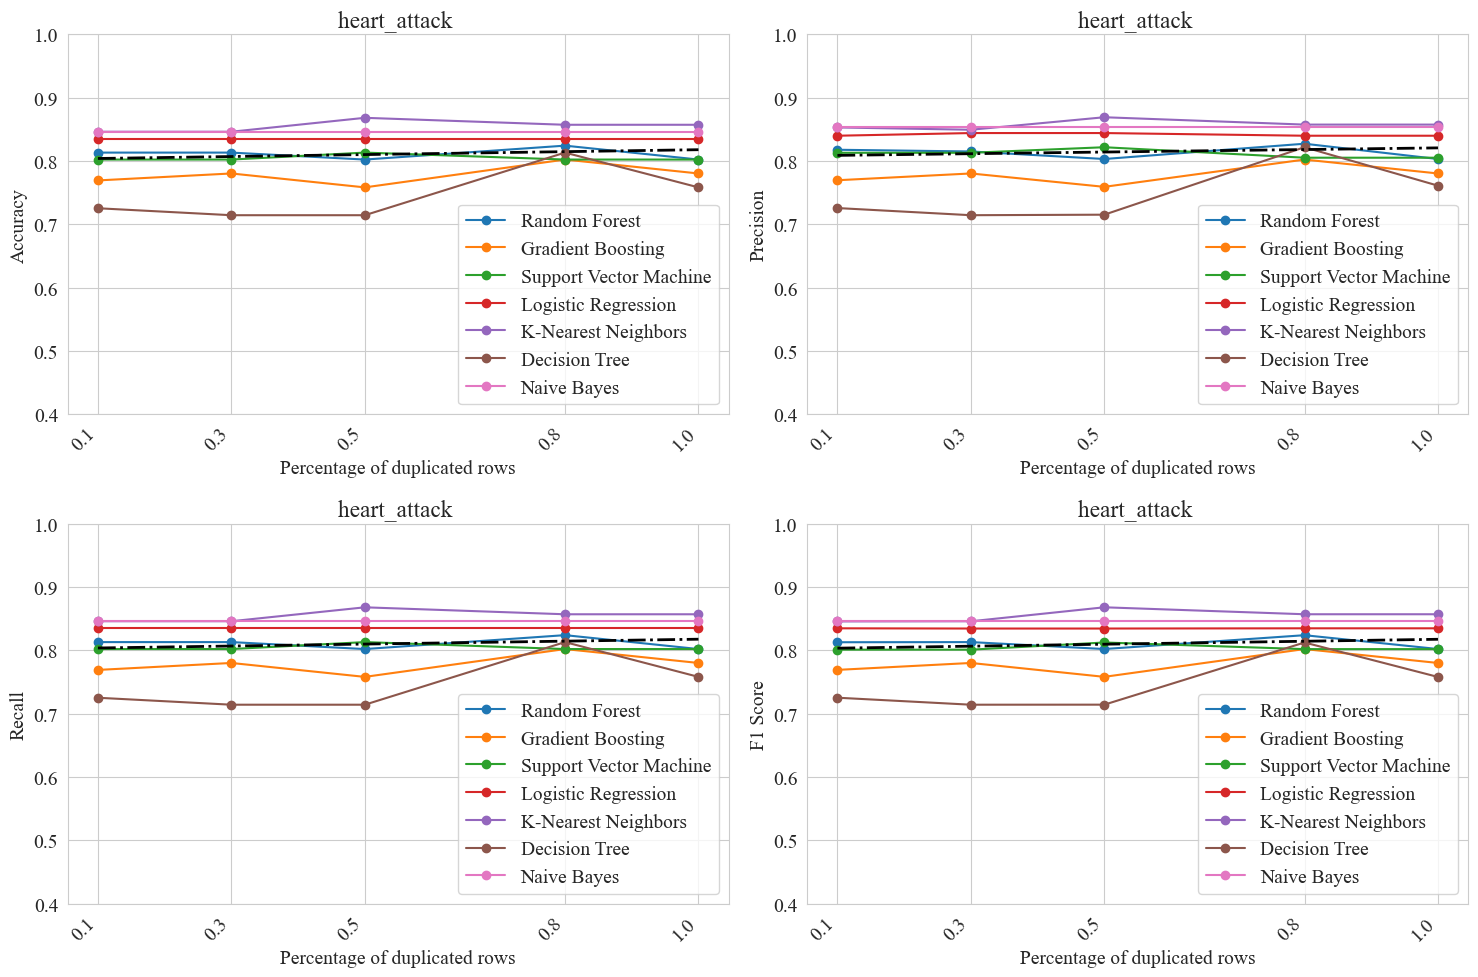

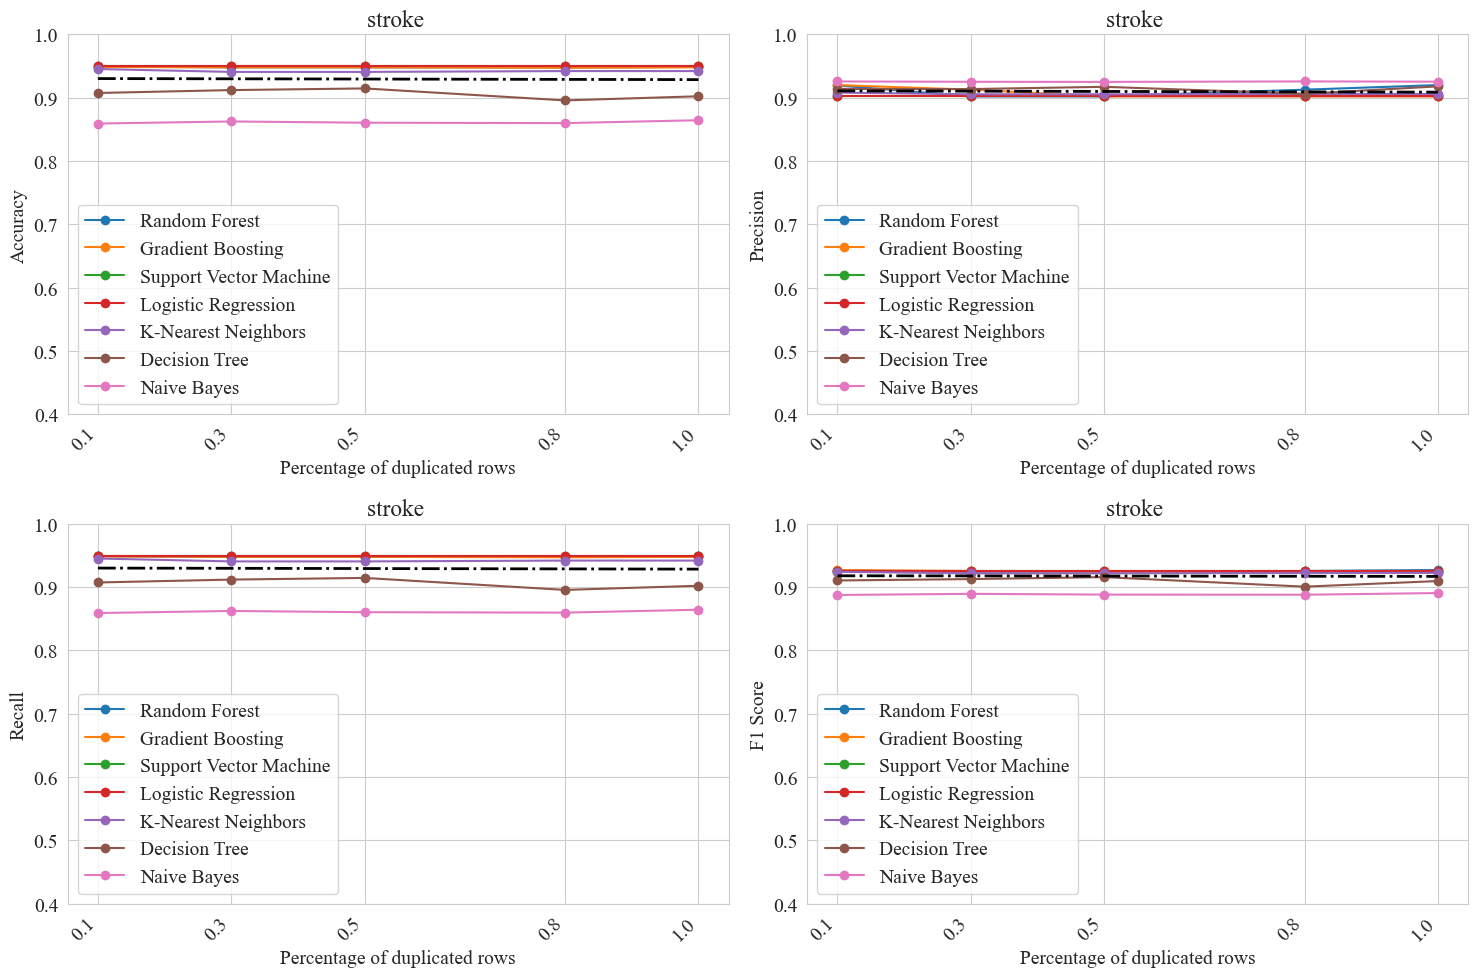

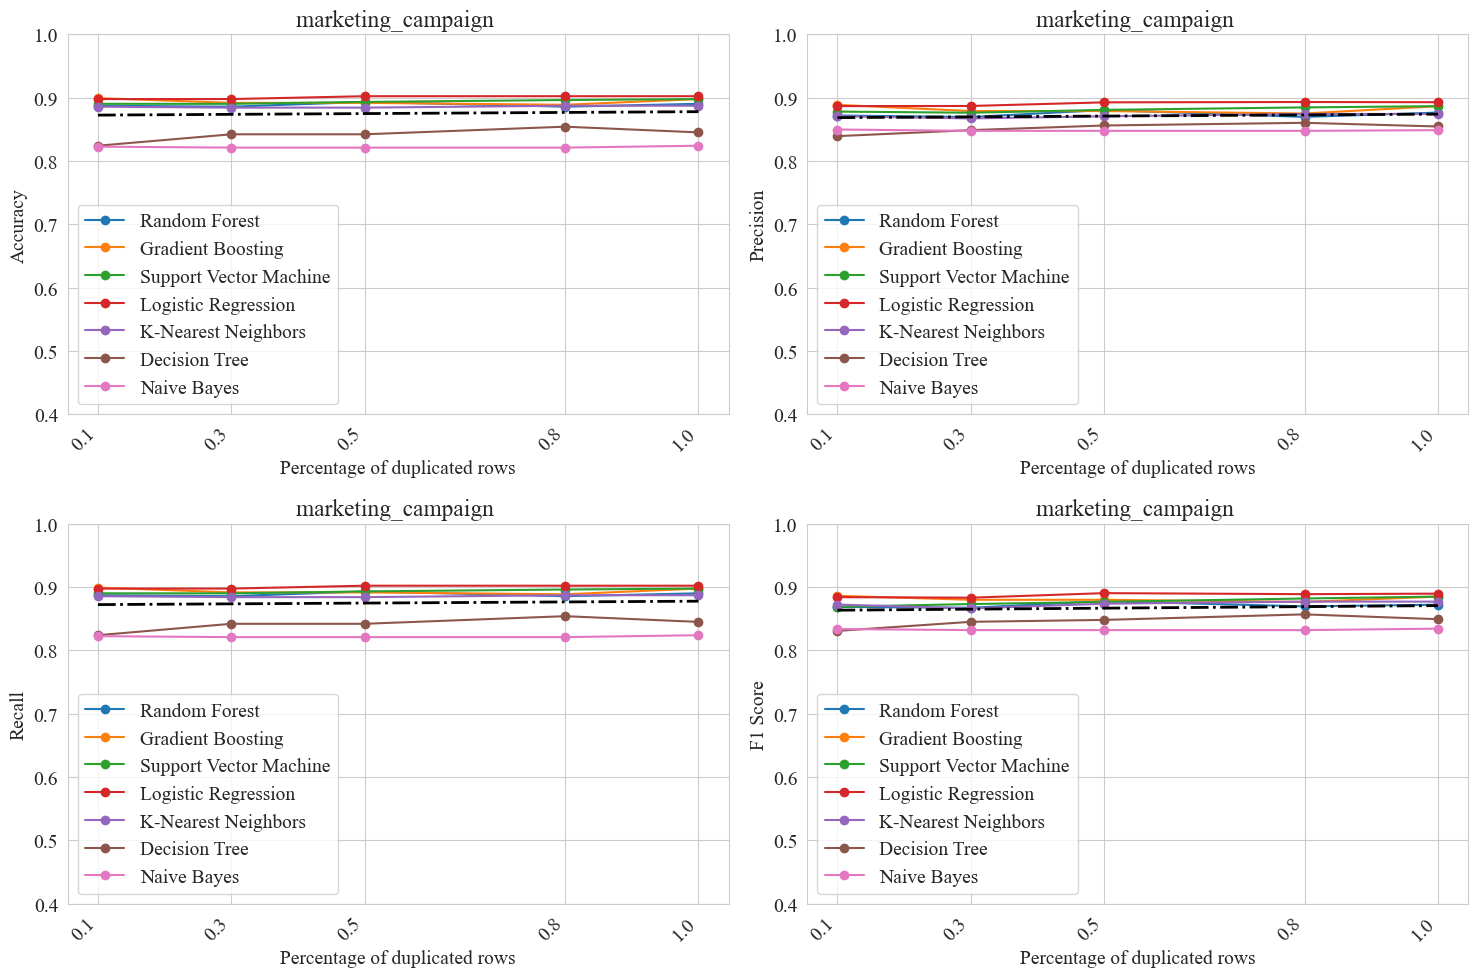

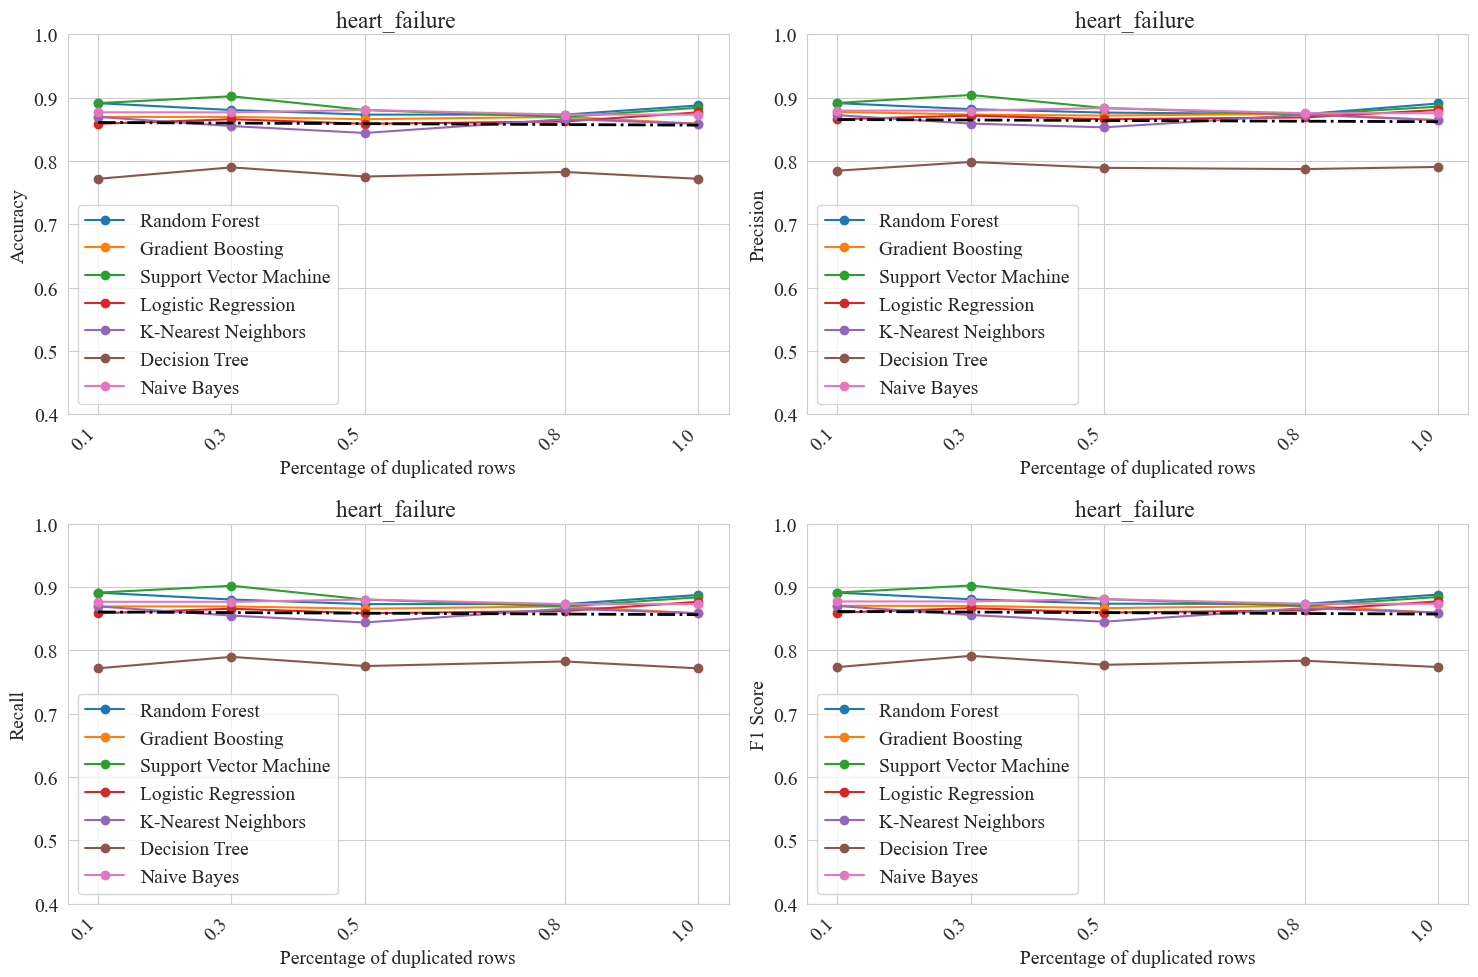

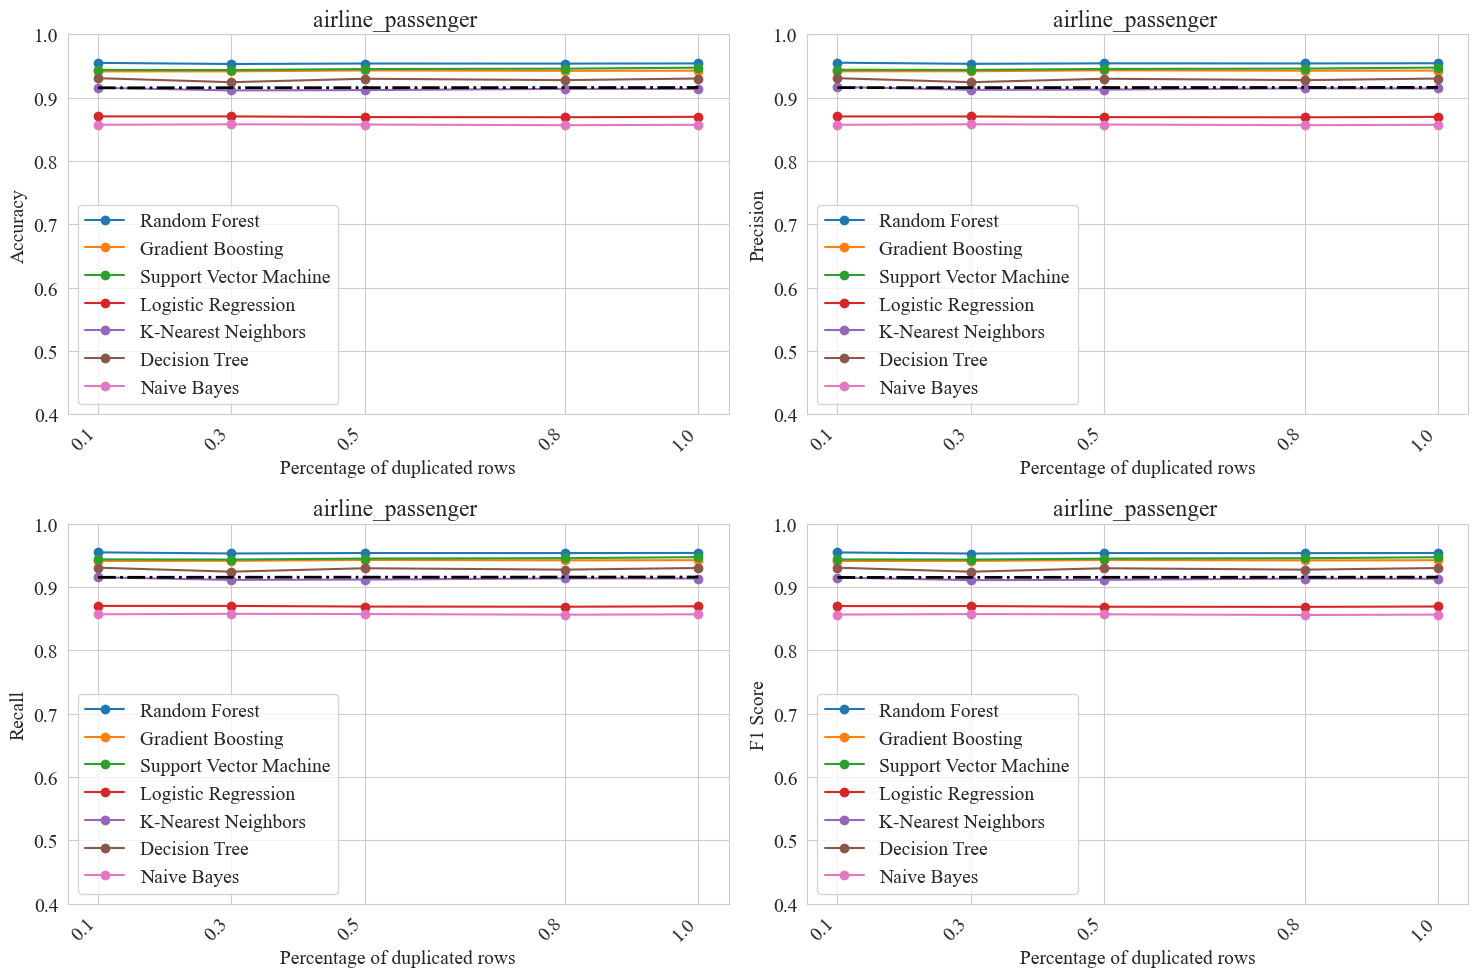

In [12]:
for h in range(0,5):
    # Plotting
    plt.figure(figsize=(15, 10))
    for k, metric in metrics.items():
        plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
        for i in range(len(classifiers)):

            z = sorted(zip(measure_steps, metric[h,i, :]))
            x=[j[0] for j in z]
            y=[j[1] for j in z]

            plt.plot(x, y, label=classifier_names[i], marker='o')
            plt.title(f'{list(datasets.keys())[h]} ')
            plt.xticks(x)
            plt.xticks(rotation=45, ha='right')

            plt.xlabel('Percentage of duplicated rows')
            plt.ylabel(k)
            plt.legend()
        z = sorted(zip(measure_steps, np.mean(metric[h],axis=0)))
        x=[j[0] for j in z]
        y=[j[1] for j in z]
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
        plt.ylim(0.4,1)

    plt.tight_layout()
    plt.savefig(f'plots/duplicates_train_{list(datasets.keys())[h]}.svg', format='svg')
    plt.show()